### Importing Packages and Data

In [3]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score

Using TensorFlow backend.


In [75]:
train_data_dir = '../Mod 6 Project/gtsrb-german-traffic-sign/Train'
test_data_dir = '../Mod 6 Project/gtsrb-german-traffic-sign/Test 2'

In [57]:
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=39209)

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [58]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [39]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

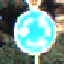

In [41]:
#for our training set, the images match with the labels
array_to_img(train_images[0])

In [42]:
#testing labels are not useable and must be remade
test_labels[0]

array([1.], dtype=float32)

### Remaking the Testing Labels

In [60]:
#Test CSV has the proper labels for the test signs
df = pd.read_csv('gtsrb-german-traffic-sign/test.csv')

In [61]:
#isolating the column and converting to string for using get dummies
test_df = df['ClassId'].astype('str')

In [62]:
#the test_df value corresponds to the correct image
test_df[0]

'16'

In [63]:
#turning the test_df into dummy variables
test_labels_df = test_df.str.get_dummies()e

In [64]:
#the dummies are true to the values but out of order
test_labels_df.iloc[0:10]

,0,1,10,11,12,13,14,15,16,17,...,39,4,40,41,42,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test_labels_list = test_labels_df.values.tolist()

In [66]:
test_labels_list

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [67]:
#converting the list of lists into a list of arrays to match train format
test_labels = []

for array in test_labels_list:
    test_labels.append(np.array(array))

In [51]:
test_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Remaking the Training Labels

In [106]:
#revising the training labels so that they are consistent with the test labels
df = pd.read_csv('gtsrb-german-traffic-sign/train.csv')
train_df = df['ClassId'].astype('str')
train_labels_df = train_df.str.get_dummies()
train_labels_list = train_labels_df.values.tolist()
train_labels = []
for array in train_labels_list:
    train_labels.append(np.array(array))


In [108]:
test_labels_final = np.array(test_labels).reshape(43, -1).T

### Reshaping Data

In [109]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(39209, 64, 64, 3)
(39209, 43)
(12630, 64, 64, 3)
(12630, 43)


In [70]:
train_img_unrow = train_images.reshape(39209, -1).T
test_img_unrow = test_images.reshape(12630, -1).T

In [71]:
train_img_final = train_img_unrow / 255
test_img_final = test_img_unrow / 255

In [112]:
print(np.shape(train_img_final))
print(np.shape(train_labels))
print(np.shape(test_img_final))
print(np.shape(test_labels))

(12288, 39209)
(39209, 43)
(12288, 12630)
(12630, 43)


In [ ]:
(12288, 39209)
(39209, 43)
(12288, 12630)
(12630, 43)

In [111]:
train_labels_final = np.array(train_labels).reshape(43, -1).T

In [87]:
np.shape(test_labels_final)

(12630, 43)

### Creating and Running the Neural Net

In [114]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [117]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [119]:
history = model.fit(train_images, train_labels_final, epochs=10, batch_size=64)

Epoch 1/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7615 - accuracy: 0.0138
Epoch 2/10
39209/39209 [==============================] - 164s 4ms/step - loss: 3.7616 - accuracy: 0.0557
Epoch 3/10
39209/39209 [==============================] - 163s 4ms/step - loss: 3.7615 - accuracy: 0.0096
Epoch 4/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7616 - accuracy: 0.0090
Epoch 5/10
39209/39209 [==============================] - 164s 4ms/step - loss: 3.7616 - accuracy: 0.0066
Epoch 6/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7615 - accuracy: 0.0317
Epoch 7/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7615 - accuracy: 0.0186
Epoch 8/10
39209/39209 [==============================] - 161s 4ms/step - loss: 3.7616 - accuracy: 0.0133
Epoch 9/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7616 - accuracy: 0.0176
Epoch 10/10
39209/39209 [=====================

In [88]:
test_loss, test_acc = model.evaluate(test_images, test_labels_final)

12630/12630 [==============================] - 16s 1ms/step


In [90]:
#first model accuracy, pre changing the training labels
score = model.evaluate(test_images, test_labels_final, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 86.36748447856164
Test accuracy: 0.01852731592953205


In [92]:
predictions_transfer = model.predict(test_images)
predictions_transfer = np.around(predictions_transfer)

In [103]:
f1_score(test_labels_final, predictions_transfer, average='micro')
#This value is so low that its not an issue of the model but rather of the label
#accuracy pre-changing the training labels

0.02511823854377807

### Second Iteration, changed training labels to match test label format

In [121]:
test_loss, test_acc = model.evaluate(test_images, test_labels_final)

12630/12630 [==============================] - 16s 1ms/step


In [122]:
score = model.evaluate(test_images, test_labels_final, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.7612090472087725
Test accuracy: 0.015676960349082947


In [123]:
predictions_transfer = model.predict(test_images)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels_final, predictions_transfer, average='micro')

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### The accuracy is  too low, it has to be a labeling issue

In [124]:
test_labels_final[0]
#there is a one at 27 which indicates that this is a sign 32 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [141]:
test_labels_df

,0,1,10,11,12,13,14,15,16,17,...,39,4,40,41,42,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
test_labels_df.columns

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '5', '6', '7', '8', '9'],
      dtype='object')

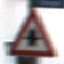

In [139]:
array_to_img(test_images[0])
#this image corresponds to sign 11 which should be coded as a 4

In [127]:
train_labels_final[1]
#there is a one at 25 and 35, not the format we expected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

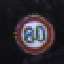

In [143]:
array_to_img(train_images[1])
#currently this photo corresponds to the above label, but maybe not consistent with the proper labeling

In [144]:
#the image data generator converts the picture into an array of pixels
train_images[1]

array([[[23., 23., 27.],
        [23., 23., 27.],
        [21., 21., 26.],
        ...,
        [19., 25., 28.],
        [24., 28., 32.],
        [24., 28., 32.]],

       [[23., 23., 27.],
        [23., 23., 27.],
        [21., 21., 26.],
        ...,
        [19., 25., 28.],
        [24., 28., 32.],
        [24., 28., 32.]],

       [[21., 21., 26.],
        [21., 21., 26.],
        [22., 22., 27.],
        ...,
        [16., 18., 20.],
        [22., 23., 24.],
        [22., 23., 24.]],

       ...,

       [[13., 12., 15.],
        [13., 12., 15.],
        [13., 12., 14.],
        ...,
        [17., 17., 22.],
        [14., 14., 18.],
        [14., 14., 18.]],

       [[13., 12., 15.],
        [13., 12., 15.],
        [12., 12., 15.],
        ...,
        [17., 18., 23.],
        [17., 17., 22.],
        [17., 17., 22.]],

       [[13., 12., 15.],
        [13., 12., 15.],
        [12., 12., 15.],
        ...,
        [17., 18., 23.],
        [17., 17., 22.],
        [17., 17., 22.]]

### Modifying ImageDataGenerator for Labels and Images

In [5]:
df = pd.read_csv('gtsrb-german-traffic-sign/test.csv')
test_df = list(df['ClassId'].astype('str'))
df['ClassId'] = df['ClassId'].astype('str')

In [6]:
df.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [31]:
#using flow from dataframe instead of directory
test_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe= df,
        directory= test_data_dir,
        x_col= 'Path',
        y_col = 'ClassId',
        target_size=(64, 64),
        batch_size=12630,
        classes= test_df,
        class_mode='raw')

Found 12630 validated image filenames.


In [32]:
test_images, test_labels = next(test_generator)

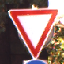

In [9]:
array_to_img(test_images[0])

In [23]:
#the labels and the images match!!!
test_labels[0]

'13'

In [17]:
df1 = pd.read_csv('gtsrb-german-traffic-sign/train.csv')
train_df = list(df1['ClassId'].astype('str'))
df1['ClassId'] = df1['ClassId'].astype('str')

In [30]:
train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe= df1,
        directory= train_data_dir,
        x_col= 'Path',
        y_col = 'ClassId',
        target_size=(64, 64),
        batch_size=39209,
        classes= train_df,
        class_mode='raw')

Found 39209 validated image filenames.


In [33]:
train_images, train_labels = next(train_generator)

In [21]:
df1['Path']

0        Train/20/00020_00000_00000.png
1        Train/20/00020_00000_00001.png
2        Train/20/00020_00000_00002.png
3        Train/20/00020_00000_00003.png
4        Train/20/00020_00000_00004.png
                      ...              
39204    Train/42/00042_00007_00025.png
39205    Train/42/00042_00007_00026.png
39206    Train/42/00042_00007_00027.png
39207    Train/42/00042_00007_00028.png
39208    Train/42/00042_00007_00029.png
Name: Path, Length: 39209, dtype: object

In [22]:
df['Path']

0        Test/00000.png
1        Test/00001.png
2        Test/00002.png
3        Test/00003.png
4        Test/00004.png
              ...      
12625    Test/12625.png
12626    Test/12626.png
12627    Test/12627.png
12628    Test/12628.png
12629    Test/12629.png
Name: Path, Length: 12630, dtype: object

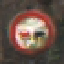

In [27]:
array_to_img(train_images[0])

In [28]:
train_labels[0]

'9'

### Labels and Images matchup for Training and Testing Datasets

In [34]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(39209, 64, 64, 3)
(39209,)
(12630, 64, 64, 3)
(12630,)


In [35]:
train_img_unrow = train_images.reshape(39209, -1).T
test_img_unrow = test_images.reshape(12630, -1).T

In [48]:
train_labels_final = to_categorical(train_labels)
test_labels_final = to_categorical(test_labels)

In [65]:
train_img_final = train_images / 255
test_img_final = test_images / 255

In [53]:
print(np.shape(train_img_final))
print(np.shape(train_labels_final))
print(np.shape(test_img_final))
print(np.shape(test_labels_final))

(12288, 39209)
(39209, 43)
(12288, 12630)
(12630, 43)


### Rerunning the Neural Net

In [59]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [61]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
history1 = model.fit(train_img_final, train_labels_final, epochs=10, batch_size=500)

Epoch 1/10
39209/39209 [==============================] - 188s 5ms/step - loss: 3.4887 - accuracy: 0.0574
Epoch 2/10
39209/39209 [==============================] - 197s 5ms/step - loss: 3.4883 - accuracy: 0.0574
Epoch 3/10
39209/39209 [==============================] - 166s 4ms/step - loss: 3.4880 - accuracy: 0.0574
Epoch 4/10
39209/39209 [==============================] - 192s 5ms/step - loss: 3.4876 - accuracy: 0.0574
Epoch 5/10
39209/39209 [==============================] - 165s 4ms/step - loss: 3.4873 - accuracy: 0.0574
Epoch 6/10
39209/39209 [==============================] - 205s 5ms/step - loss: 3.4871 - accuracy: 0.0574
Epoch 7/10
39209/39209 [==============================] - 160s 4ms/step - loss: 3.4868 - accuracy: 0.0574
Epoch 8/10
39209/39209 [==============================] - 185s 5ms/step - loss: 3.4867 - accuracy: 0.0574
Epoch 9/10
39209/39209 [==============================] - 160s 4ms/step - loss: 3.4865 - accuracy: 0.0574
Epoch 10/10
39209/39209 [=====================

In [69]:
test_loss, test_acc = model.evaluate(test_img_final, test_labels_final)

12630/12630 [==============================] - 40s 3ms/step


In [73]:
score = model.evaluate(test_img_final, test_labels_final, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.464861751829738
Test accuracy: 0.059382423758506775


In [72]:
predictions_transfer = model.predict(test_img_final)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels_final, predictions_transfer, average='micro')

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### Score is too low. New labeling method

In [76]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    train_data_dir,
                    target_size=(64,64),
                    classes=[str(i) for i in np.arange(43)],
                    batch_size=39209)

test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    test_data_dir,
                    target_size=(64,64),
                    classes=[],
                    batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [77]:
train_data, train_labels = next(train_batches)
test_data, test_labels = next(test_batches)

In [78]:
train_labels = np.array([list(img).index(1.0) for img in train_labels])

In [79]:

# test labels
path_test = [int(i.replace('Test/','').replace('.png','')) for i in list(df['Path'])]
id_test = list(df['ClassId'])
path_id = dict(zip(path_test, id_test))
labels = [path_id[batch] for batch in list(test_batches.index_array)]
test_labels = np.array(labels)

In [80]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [81]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)       

In [82]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
history = model.fit(train_data,
                    train_labels,  
                    epochs=8, 
                    batch_size=750)

Epoch 1/8
39209/39209 [==============================] - 116s 3ms/step - loss: 2.4103 - accuracy: 0.3980
Epoch 2/8
39209/39209 [==============================] - 107s 3ms/step - loss: 0.7301 - accuracy: 0.7930
Epoch 3/8
39209/39209 [==============================] - 125s 3ms/step - loss: 0.3358 - accuracy: 0.9042
Epoch 4/8
39209/39209 [==============================] - 111s 3ms/step - loss: 0.2172 - accuracy: 0.9386
Epoch 5/8
39209/39209 [==============================] - 110s 3ms/step - loss: 0.1568 - accuracy: 0.9555
Epoch 6/8
39209/39209 [==============================] - 124s 3ms/step - loss: 0.1204 - accuracy: 0.9658
Epoch 7/8
39209/39209 [==============================] - 114s 3ms/step - loss: 0.0966 - accuracy: 0.9721
Epoch 8/8
39209/39209 [==============================] - 131s 3ms/step - loss: 0.0801 - accuracy: 0.9764


In [84]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

12630/12630 [==============================] - 12s 972us/step


0.9007917642593384

In [85]:
predictions_transfer = model.predict(test_data)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels, predictions_transfer, average='micro')
#the training accuracy is very high but test accuracy and F1 score are relatively low

0.8830685311052426

### Neural Net Revision #1

In [86]:
#previous model used dropout so run original model with no dropout
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

In [87]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
history = model.fit(train_data,
                    train_labels,  
                    epochs=8, 
                    batch_size=750)

Epoch 1/8
39209/39209 [==============================] - 181s 5ms/step - loss: 2.7948 - accuracy: 0.2818
Epoch 2/8
39209/39209 [==============================] - 170s 4ms/step - loss: 0.9533 - accuracy: 0.7384
Epoch 3/8
39209/39209 [==============================] - 192s 5ms/step - loss: 0.3353 - accuracy: 0.9084
Epoch 4/8
39209/39209 [==============================] - 157s 4ms/step - loss: 0.1703 - accuracy: 0.9567
Epoch 5/8
39209/39209 [==============================] - 168s 4ms/step - loss: 0.1039 - accuracy: 0.9739
Epoch 6/8
39209/39209 [==============================] - 158s 4ms/step - loss: 0.0709 - accuracy: 0.9832
Epoch 7/8
39209/39209 [==============================] - 176s 4ms/step - loss: 0.0500 - accuracy: 0.9883
Epoch 8/8
39209/39209 [==============================] - 154s 4ms/step - loss: 0.0471 - accuracy: 0.9882


In [89]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

12630/12630 [==============================] - 30s 2ms/step


0.9139350652694702

In [90]:
predictions_transfer = model.predict(test_data)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels, predictions_transfer, average='micro')

0.9162368557834554

### Reducing Overfitting with L2 Regularization

In [92]:
from keras import regularizers

In [93]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

In [94]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
history = model.fit(train_data,
                    train_labels,  
                    epochs=8, 
                    batch_size=750)

Epoch 1/8
39209/39209 [==============================] - 173s 4ms/step - loss: 2.9472 - accuracy: 0.3009
Epoch 2/8
39209/39209 [==============================] - 157s 4ms/step - loss: 1.1625 - accuracy: 0.7084
Epoch 3/8
39209/39209 [==============================] - 238s 6ms/step - loss: 0.5185 - accuracy: 0.9004
Epoch 4/8
39209/39209 [==============================] - 177s 5ms/step - loss: 0.3407 - accuracy: 0.9515
Epoch 5/8
39209/39209 [==============================] - 155s 4ms/step - loss: 0.2711 - accuracy: 0.9692
Epoch 6/8
39209/39209 [==============================] - 174s 4ms/step - loss: 0.2274 - accuracy: 0.9777
Epoch 7/8
39209/39209 [==============================] - 159s 4ms/step - loss: 0.1967 - accuracy: 0.9849
Epoch 8/8
39209/39209 [==============================] - 176s 5ms/step - loss: 0.1724 - accuracy: 0.9891


In [96]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

12630/12630 [==============================] - 22s 2ms/step


0.9095803499221802

In [97]:
predictions_transfer = model.predict(test_data)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels, predictions_transfer, average='micro')
#F1 Score and test accuracy have not changed much with regularization

0.9109398329365239

### Using a different optimizer in compilation

In [98]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

In [99]:
#using an rmsprop optimizer over adam
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
history = model.fit(train_data,
                    train_labels,  
                    epochs=8, 
                    batch_size=750)

Epoch 1/8
39209/39209 [==============================] - 153s 4ms/step - loss: 3.2494 - accuracy: 0.1680
Epoch 2/8
39209/39209 [==============================] - 1018s 26ms/step - loss: 1.9342 - accuracy: 0.4569
Epoch 3/8
39209/39209 [==============================] - 159s 4ms/step - loss: 1.1350 - accuracy: 0.6644
Epoch 4/8
39209/39209 [==============================] - 150s 4ms/step - loss: 0.6452 - accuracy: 0.8096
Epoch 5/8
39209/39209 [==============================] - 163s 4ms/step - loss: 0.3649 - accuracy: 0.8947
Epoch 6/8
39209/39209 [==============================] - 150s 4ms/step - loss: 0.2106 - accuracy: 0.9422
Epoch 7/8
39209/39209 [==============================] - 169s 4ms/step - loss: 0.1276 - accuracy: 0.9634
Epoch 8/8
39209/39209 [==============================] - 145s 4ms/step - loss: 0.0947 - accuracy: 0.9771


In [101]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

12630/12630 [==============================] - 18s 1ms/step


0.9309580326080322

In [102]:
predictions_transfer = model.predict(test_data)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels, predictions_transfer, average='micro')

0.9335839097924747

### Looking at Mispredictions

In [125]:
wrong_preds = []
for i in range(len(test_labels)):
    if np.argmax(test_labels[i]) ==  np.argmax(predictions_transfer[i]):
        continue
    else:
        wrong_preds.append(i)
        

In [126]:
wrong_preds

[23,
 27,
 33,
 74,
 107,
 124,
 133,
 151,
 154,
 176,
 187,
 194,
 202,
 214,
 222,
 236,
 249,
 250,
 279,
 289,
 320,
 339,
 351,
 359,
 372,
 390,
 419,
 422,
 429,
 475,
 517,
 520,
 526,
 595,
 600,
 602,
 604,
 608,
 610,
 620,
 628,
 634,
 635,
 643,
 656,
 663,
 666,
 673,
 679,
 681,
 684,
 705,
 730,
 734,
 746,
 753,
 787,
 807,
 810,
 823,
 824,
 840,
 852,
 872,
 893,
 910,
 920,
 940,
 980,
 1010,
 1019,
 1037,
 1038,
 1056,
 1061,
 1062,
 1110,
 1114,
 1126,
 1127,
 1135,
 1136,
 1146,
 1159,
 1160,
 1161,
 1181,
 1201,
 1210,
 1221,
 1229,
 1281,
 1285,
 1298,
 1299,
 1301,
 1312,
 1361,
 1368,
 1374,
 1384,
 1387,
 1392,
 1435,
 1442,
 1446,
 1472,
 1491,
 1522,
 1529,
 1553,
 1590,
 1593,
 1606,
 1615,
 1625,
 1633,
 1634,
 1635,
 1645,
 1652,
 1672,
 1683,
 1688,
 1740,
 1745,
 1752,
 1770,
 1777,
 1788,
 1806,
 1811,
 1828,
 1830,
 1865,
 1878,
 1880,
 1881,
 1884,
 1892,
 1898,
 1899,
 1911,
 1930,
 1943,
 1945,
 1984,
 1985,
 1996,
 1997,
 2021,
 2041,
 2045,
 2

In [115]:
test_labels[23]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [148]:
predictions_transfer[23]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

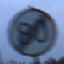

In [134]:
array_to_img(test_data[23])

In [139]:
list(test_labels[23]).index(1)

6

In [142]:
list(predictions_transfer[23]).index(1.0)

5

In [152]:
error_tuples = []
for i in wrong_preds:
    try:
        label = list(test_labels[i]).index(1.)
        predict = list(predictions_transfer[i]).index(1.)
        atuple = (label,predict)
        error_tuples.append(atuple)
    except:
        continue
   

In [153]:
error_tuples

[(6, 5),
 (1, 2),
 (17, 12),
 (8, 5),
 (18, 19),
 (38, 36),
 (3, 5),
 (18, 31),
 (37, 35),
 (17, 12),
 (5, 2),
 (27, 11),
 (4, 2),
 (3, 5),
 (8, 4),
 (0, 8),
 (30, 29),
 (6, 5),
 (30, 20),
 (11, 23),
 (39, 35),
 (42, 41),
 (2, 13),
 (18, 31),
 (0, 1),
 (30, 20),
 (4, 5),
 (25, 11),
 (28, 30),
 (21, 31),
 (24, 23),
 (13, 1),
 (35, 33),
 (23, 30),
 (23, 19),
 (18, 11),
 (21, 12),
 (5, 3),
 (1, 9),
 (7, 8),
 (24, 23),
 (18, 25),
 (2, 5),
 (30, 29),
 (8, 5),
 (21, 23),
 (29, 3),
 (11, 42),
 (11, 30),
 (12, 2),
 (39, 33),
 (24, 11),
 (7, 5),
 (42, 10),
 (7, 1),
 (6, 5),
 (7, 8),
 (4, 1),
 (11, 27),
 (23, 30),
 (23, 30),
 (18, 27),
 (18, 27),
 (17, 26),
 (17, 13),
 (38, 35),
 (8, 4),
 (30, 29),
 (21, 31),
 (3, 5),
 (21, 19),
 (10, 20),
 (41, 9),
 (23, 19),
 (5, 2),
 (6, 5),
 (40, 35),
 (1, 2),
 (38, 36),
 (23, 19),
 (30, 20),
 (25, 30),
 (18, 19),
 (16, 6),
 (38, 8),
 (7, 5),
 (26, 31),
 (9, 3),
 (18, 30),
 (18, 31),
 (18, 11),
 (18, 2),
 (1, 7),
 (28, 2),
 (0, 1),
 (8, 7),
 (1, 2),
 (21, 23

In [157]:
from collections import Counter

In [158]:
cnt = Counter()

for word in error_tuples:
    cnt[word] += 1

In [162]:
{k: v for k, v in sorted(cnt.items(), key=lambda item: item[1])}


{(42, 41): 1,
 (2, 13): 1,
 (13, 1): 1,
 (29, 3): 1,
 (11, 42): 1,
 (16, 6): 1,
 (38, 8): 1,
 (26, 31): 1,
 (18, 2): 1,
 (1, 7): 1,
 (28, 2): 1,
 (10, 5): 1,
 (22, 25): 1,
 (16, 20): 1,
 (20, 11): 1,
 (4, 3): 1,
 (10, 30): 1,
 (13, 25): 1,
 (31, 8): 1,
 (4, 9): 1,
 (5, 4): 1,
 (2, 4): 1,
 (10, 6): 1,
 (12, 11): 1,
 (10, 4): 1,
 (6, 20): 1,
 (13, 42): 1,
 (18, 1): 1,
 (0, 3): 1,
 (28, 24): 1,
 (26, 18): 1,
 (8, 2): 1,
 (13, 10): 1,
 (34, 4): 1,
 (24, 18): 1,
 (20, 31): 1,
 (8, 14): 1,
 (23, 31): 1,
 (12, 1): 1,
 (6, 42): 1,
 (25, 10): 1,
 (4, 0): 1,
 (11, 20): 1,
 (38, 12): 1,
 (13, 35): 1,
 (30, 4): 1,
 (1, 26): 1,
 (31, 25): 1,
 (3, 7): 1,
 (10, 12): 1,
 (8, 1): 1,
 (18, 6): 1,
 (25, 2): 1,
 (22, 20): 1,
 (10, 17): 1,
 (25, 20): 1,
 (15, 2): 1,
 (33, 36): 1,
 (22, 26): 1,
 (5, 8): 1,
 (2, 3): 1,
 (24, 27): 1,
 (18, 22): 1,
 (24, 25): 1,
 (9, 2): 1,
 (31, 23): 1,
 (15, 1): 1,
 (7, 11): 1,
 (3, 42): 1,
 (11, 19): 1,
 (25, 27): 1,
 (3, 13): 1,
 (24, 29): 1,
 (17, 12): 2,
 (8, 4): 2,
 (1,